# Coronavirus/COVID-19 Timseries Forecasting

- ~~[GitHub Repo](https://github.com/jirvingphd/playing-with-coronavirus-data)~~
- James M. Irivng, Ph.D.
- james.irving.phd@gmail.com

> **~~NOTE: DATA ACQUISITION IS BEING RE-WORKED IN "Exploring Options for Replacing Covid Tracking Project Data_08-2021.ipnynb"~~** -08/12/21

In [1]:
## Fetch new data (if True (long process - ~2 mins)
RUN_FULL_WORKFLOW = False
RUN_MODELS = True

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coronavirus/COVID-19-Timseries-Forecasting" data-toc-modified-id="Coronavirus/COVID-19-Timseries-Forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coronavirus/COVID-19 Timseries Forecasting</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OBTAIN</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Downloading-or-Loading-Data" data-toc-modified-id="Downloading-or-Loading-Data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Downloading or Loading Data</a></span></li></ul></li></ul></li><li><span><a href="#EDA---Comparing-States" data-toc-modified-id="EDA---Comparing-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA - Comparing States</a></span><ul class="toc-item"><li><span><a href="#09/12/21---Adding-EDA-Pre-Modeling" data-toc-modified-id="09/12/21---Adding-EDA-Pre-Modeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>09/12/21 - Adding EDA Pre-Modeling</a></span></li><li><span><a href="#Making-Plotly-Figures-for-App-[09/12/21]" data-toc-modified-id="Making-Plotly-Figures-for-App-[09/12/21]-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>Making Plotly Figures for App [09/12/21]</strong></a></span><ul class="toc-item"><li><span><a href="#TO-DO's" data-toc-modified-id="TO-DO's-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><strong>TO DO's</strong></a></span></li><li><span><a href="#flexible-data-loading-in-get_state_df_ts" data-toc-modified-id="flexible-data-loading-in-get_state_df_ts-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>flexible data loading in <code>get_state_df_ts</code></a></span></li></ul></li><li><span><a href="#Outlier-Detection-Methods" data-toc-modified-id="Outlier-Detection-Methods-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Outlier Detection Methods</a></span><ul class="toc-item"><li><span><a href="#✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts" data-toc-modified-id="✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span><strong>✔ TO DO: make remove_outliers into a helper function and addd to <code>get_state_df_ts</code></strong></a></span></li><li><span><a href="#Visualizing-Outlier-Removal" data-toc-modified-id="Visualizing-Outlier-Removal-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Visualizing Outlier Removal</a></span></li><li><span><a href="#developing-remove_outliers_ts" data-toc-modified-id="developing-remove_outliers_ts-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>developing <code>remove_outliers_ts</code></a></span></li><li><span><a href="#write-get_state_df_ts_final-(will-replace-original-get_state_df_ts-when-completed)" data-toc-modified-id="write-get_state_df_ts_final-(will-replace-original-get_state_df_ts-when-completed)-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>write <code>get_state_df_ts_final</code> (will replace original <code>get_state_df_ts</code> when completed)</a></span></li><li><span><a href="#Using-New-Functions-in-get_states_to_plot" data-toc-modified-id="Using-New-Functions-in-get_states_to_plot-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Using New Functions in <code>get_states_to_plot</code></a></span></li><li><span><a href="#Map-of-US-Stats-for-time-period" data-toc-modified-id="Map-of-US-Stats-for-time-period-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Map of US Stats for time period</a></span></li><li><span><a href="#Cases-in-the-Last-90-Days" data-toc-modified-id="Cases-in-the-Last-90-Days-4.3.7"><span class="toc-item-num">4.3.7&nbsp;&nbsp;</span>Cases in the Last 90 Days</a></span></li></ul></li><li><span><a href="#BOOKMARK-09/12" data-toc-modified-id="BOOKMARK-09/12-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>BOOKMARK 09/12</a></span></li></ul></li><li><span><a href="#Selected-States-[Prior-to-09/12/21]" data-toc-modified-id="Selected-States-[Prior-to-09/12/21]-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selected States [Prior to 09/12/21]</a></span><ul class="toc-item"><li><span><a href="#FL" data-toc-modified-id="FL-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FL</a></span><ul class="toc-item"><li><span><a href="#Calc-Delta-Cases/Deaths" data-toc-modified-id="Calc-Delta-Cases/Deaths-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Calc Delta Cases/Deaths</a></span></li></ul></li></ul></li><li><span><a href="#Time-Series-Modeling" data-toc-modified-id="Time-Series-Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time Series Modeling</a></span><ul class="toc-item"><li><span><a href="#MD" data-toc-modified-id="MD-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>MD</a></span><ul class="toc-item"><li><span><a href="#MD---Cases-New" data-toc-modified-id="MD---Cases-New-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>MD - Cases-New</a></span></li><li><span><a href="#MD---Hospitalized-Currently" data-toc-modified-id="MD---Hospitalized-Currently-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>MD - Hospitalized Currently</a></span></li></ul></li><li><span><a href="#🚨-BOOKMARK:-Data-Quality-Issue---Deaths" data-toc-modified-id="🚨-BOOKMARK:-Data-Quality-Issue---Deaths-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>🚨 BOOKMARK: Data Quality Issue - Deaths</a></span><ul class="toc-item"><li><span><a href="#MD---Deaths-New" data-toc-modified-id="MD---Deaths-New-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>MD - Deaths-New</a></span></li></ul></li></ul></li><li><span><a href="#Function-For-Any-Given-State/-Column" data-toc-modified-id="Function-For-Any-Given-State/-Column-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Function For Any Given State/ Column</a></span></li><li><span><a href="#End-of-09/11/21-Work" data-toc-modified-id="End-of-09/11/21-Work-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>End of 09/11/21 Work</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Making-Dict/DataFrame-compatible-make_models_flexible" data-toc-modified-id="Making-Dict/DataFrame-compatible-make_models_flexible-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Making Dict/DataFrame compatible <code>make_models_flexible</code></a></span></li></ul></li></ul></li><li><span><a href="#@interact" data-toc-modified-id="@interact-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><code>@interact</code></a></span></li><li><span><a href="#APPENDIX" data-toc-modified-id="APPENDIX-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>APPENDIX</a></span></li></ul></div>

# Business Problem

- Covid-19 and the various strains that have since emerged has upended modern life and fundamental changed how we function as a society.
- Part of what has made it difficult to tackle the pandemic is due to differences between states, state laws/policies, and a lack of public understanding about the predictability of the surges in cases. 


### Goal

- The goal of this notebook is to produce a workflow for producing forecasts of the following metrics at least 1 week ahead of time. 
    - Confirmed Cases
    - Number of Deaths
    - ICU Capacity
    
- The stretch goal for the project is to create a streamlit dashboard for getting state-level forecasts for any state in the US, using fresh daily data.
    

### Methodology

- To select 3-5 prototypical states representing very different time courses/
- Initial Thoughts:
    - NY
    - TX
    - FL
    - MD
    - LA

- See `data_acquisition.py`> `FULL_WORKFLOW()` and `1_Replacing Covid Tracking Project - Simplified Workflow.ipynb` for details (for now)


# OBTAIN

## Imports

In [2]:
# !pip install -U pmdarima
# !pip install -U fsds

from fsds.imports import *

fsds v0.4.4 loaded.


In [3]:
## Custom Functions and Classes
%load_ext autoreload
%autoreload 2
import project_functions as fn
# import fsds.pandemic as fn

In [4]:
import os,glob,sys,joblib,zipfile,json
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

plt.rcParams['figure.figsize'] = (12,6)
pd.set_option('display.max_columns',0)
# fs.check_package_versions(['statsmodels'],fpath=True)

In [5]:
### FORECAST SPECIFIC FUNCTIONS
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

fs.check_package_versions(['statsmodels','pmdarima'],fpath=False)

In [6]:
# import statsmodels
# print(f"Statsmodels version: {statsmodels.__version__}")

# import pmdarima
# print(f"pmdarima version: {pmdarima.__version__}")

## Data

In [7]:
## Using new savedd FILE_DIRECTORIES
import os,json,glob

with open("FILE_DIRECTORY.json") as f:
    FPATHS = json.load(f)
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [8]:
## List files stored in directories
for path_name,fpath in FPATHS.items():
    try:
        
        found_files =  sorted(os.listdir(fpath))
        print(f"\n[i] Files stored in {path_name}:")
        [print("\t",i,x) for i,x in enumerate(found_files)]
    except:
        pass



[i] Files stored in fpath_raw:
	 0 .ipynb_checkpoints
	 1 CONVENIENT_us_metadata.csv
	 2 RAW_us_confirmed_cases.csv
	 3 RAW_us_deaths.csv
	 4 covid19-data-from-john-hopkins-university.zip
	 5 hospital_data.csv

[i] Files stored in fpath_clean:
	 0 COLUMNS.joblib
	 1 FINAL_STATES.csv.gz
	 2 FINAL_STATES.joblib
	 3 FINAL_STATES.pickle
	 4 STATE_DICT.joblib
	 5 combined_us_states_full_data.csv
	 6 state_data
	 7 us_states_cases_deaths.csv
	 8 us_states_daily_cases_deaths.csv

[i] Files stored in fpath_reference:
	 0 COLUMNS.joblib
	 1 population-by-country-2020.zip
	 2 state_codes_to_names_map.joblib
	 3 state_names_to_codes_map.joblib
	 4 united_states_abbreviations.csv
	 5 us_metadata_counties.csv
	 6 us_metadata_states.csv

[i] Files stored in fpath_state_data:


In [9]:
# RUN_FULL_WORKFLOW=True

In [10]:
# ## making mapper dict to rename new columns
# new_to_match_old_map = {
#     'Deaths':'death',
#     'Cases':'positive',
#     'total_adult_patients_hospitalized_confirmed_covid':'hospitalizedCurrently',
# 'adult_icu_bed_covid_utilization_numerator':'inIcuCurrently'}
# ## making mapper dict to rename new columns
# new_to_final_names = {
#     'Deaths':'Deaths',
#     'Cases':'Cases',
#     'total_adult_patients_hospitalized_confirmed_covid':'Hospitalized Currently',
# 'adult_icu_bed_covid_utilization_numerator':'ICU-Covid Currently'}
# list(new_to_final_names.keys())

### Downloading or Loading Data

In [11]:
## Uncomment Cell to acquire new data
if RUN_FULL_WORKFLOW:
    DF,STATES = fn.data_acquisition.FULL_WORKFLOW(merge_hospital_data=True)
    ## renaming since merge_hofspital_data=True
#     DF = DF.copy()
#     print(STATES.keys())    
    
else:
    print(f"[i] Using previously downloaded data...")
    DF = pd.read_pickle(FPATHS['fpath_final_df_pickle'])
    
#     with open(FPATHS['fpath_final_states']) as f:
    STATES = joblib.load(FPATHS['fpath_final_states'])
#     DF = pd.read_csv(os.path.join(fpath_clean,
#                                          'combined_us_states_full_data.csv'))
#     STATES = joblib.load(os.path.join(fpath_clean,'STATE_DICT.joblib'))

display(DF.head())
print(STATES.keys())

[i] Using previously downloaded data...


Deaths  Cases  ...  Deaths-New  Cases-New
   Date                       ...                       
AK 2020-03-23       0     39  ...         0.0        0.0
   2020-03-24       0     43  ...         0.0        4.0
   2020-03-25       1     50  ...         1.0        7.0
   2020-03-26       1     64  ...         0.0       14.0
   2020-03-27       1     75  ...         0.0       11.0

[5 rows x 6 columns]

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


# EDA - Comparing States

## 09/12/21 - Adding EDA Pre-Modeling

- [ ] Move get_state_df_ts to here and plot functions here 
- [ ] Calculate rates of statistics for recent time period and visualize 
    - [ ] Use this to decide which states are included in modeling below

## **Making Plotly Figures for App [09/12/21]**

### **TO DO's**

- [ ] **To DO: reconcile old functions with new data.**
    - When comparing current code with old dash app and related functions, realized old dash expected a dataframe with the states as the columns and that the new functions were especting a dictionary.
    - My current version fo the dataframe (`DF`), has the states and dates as a multi-index, not columns


- [ ] update `project_functions.timeseries_modeling`  with new `make_time_series_model_flexible`**



- [ ] update `project_functions.app_functions` with new:
    - `get_state_df_ts`
    - `remove_outliers_df`

       
- [ ] **add outlier removal to get_state_df_ts???**

In [12]:
%load_ext autoreload
%autoreload 2
from project_functions import app_functions as af
# dir(af)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# import inspect

# def get_default_args(func):
#     """Source: https://newbedev.com/get-a-function-argument-s-default-value"""
#     signature = inspect.signature(func)
#     return {
#         k: v.default
#         for k, v in signature.parameters.items()
#         if v.default is not inspect.Parameter.empty
#     }

### flexible data loading in `get_state_df_ts`

In [14]:
## to replace af.get_state_ts



### BEST VERSION YET! 09/12 ######
def get_state_df_ts(STATES, state_name,ts_col=None,group_col='state',# legacy compatible
                     freq='D', start_date='08-2020', agg_func='mean', #formerly sum
                    fill_nans=True, fill_method='interpolate',
                    rename_cols=True,name_sep=' - ',state_first=True,diagnose=True):
    """Take df_us and extracts state's data as then Freq/Aggregation provided
    
    
    Paramters:
    
        - DF
        - state_name
        - ts_col
        - group_col
        - freq 
        - start_date
        - agg_func
        -  fill_nans
        - fill_method
    
    """
    import inspect
    args = inspect.signature(get_state_df_ts)
    args = {k:v.default for k,v in args.parameters.items()}  
    
    
    if isinstance(STATES,dict):
        state_df = STATES[state_name].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        state_df = STATES.loc[state_name].copy()

    else:
        ## Get state_df group
        state_df = STATES.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        
    ## visualize pre-resampling
    if diagnose:
        pfig = px.line(state_df,title='Pre-Resampling')
        pfig.show()
    
    
    if agg_func=='as_freq':
        try:
            state_df = state_df.resample(freq).asfreq(freq)
        except Exception as e:

            agg_func = args['agg_func']
            state_df = state_df.resample(freq).agg(agg_func)
            print(f"[!] Erorr using agg_func='as_freq'; Using default agg_func ('{agg_func}') instead.")
            print('\tError message below:')
            print("\t",e)        
    elif agg_func is None:
        pass
    else:
        ## Resample and aggregate state data
        state_df = state_df.resample(freq).agg(agg_func)
        
    ## Slice out time period desired.
    state_df = state_df.loc[start_date:]
    

    
    
    ## Deal with null values:
    if fill_method == 'interpolate':
        state_df = state_df.interpolate()
        
    elif fill_method == None:
        pass
    
    else:
        state_df = state_df.fillna(method=fill_method)
        
        
        

     ## Renamed columns with state name
    if rename_cols == True:
    
        ## Get and Rename Sum Cols 
        orig_cols = state_df.columns

        for col in orig_cols:

            if state_first==True:
                new_col_name = f"{state_name}{name_sep}{col}"
            else:
                new_col_name = f"{col}{name_sep}{state_name}"

            state_df[new_col_name] = state_df[col].copy()

        ## Drop original cols
        state_df.drop(orig_cols,axis=1,inplace=True)
    
    
    
    ## Return only columns containing ts_cols
    if ts_col is not None:

        if isinstance(ts_col,str):
            ts_col = [ts_col]

            # find cols that end with the column name
        selected_cols=[]
        for col in ts_col:
            selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
        state_df = state_df[selected_cols]
        
    ## Add outlier removal here:
        
        
        
    ## Visualize post-resampling 
    if diagnose:
            pfig = px.line(state_df,title="post-Resampling")
            pfig.show()
    
    
    
    
    return state_df

In [15]:
## list comp to select columns that are more than one word
selected_cols = [c for c in DF.columns if (len(c.split('-'))>1) | (len(c.split(' '))>1)]
selected_cols

['Hospitalized Currently', 'ICU-Covid Currently', 'Deaths-New', 'Cases-New']

In [16]:
test_df = get_state_df_ts(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
                          rename_cols=True,fill_method='interpolate',diagnose=True)#state_first=False)

[!] Erorr using agg_func='as_freq'; Using default agg_func ('mean') instead.
	Error message below:
	 cannot reindex from a duplicate axis


In [17]:
test_df_py = af.get_state_df_ts(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
                          rename_cols=True,fill_method='interpolate',diagnose=True)#state_first=False)

[!] Erorr using agg_func='as_freq'; Using default agg_func ('mean') instead.
	Error message below:
	 cannot reindex from a duplicate axis


In [18]:
# px.line(test_df)

## Outlier Detection Methods

### **✔ TO DO: make remove_outliers into a helper function and addd to `get_state_df_ts`**

In [19]:
test_df = get_state_df_ts(DF,'MD',agg_func= 'as_freq',ts_col=selected_cols,
                          rename_cols=False,fill_method='interpolate',
                          diagnose=False)#state_first=False)
ts =test_df['Deaths-New']
px.line(ts)

[!] Erorr using agg_func='as_freq'; Using default agg_func ('mean') instead.
	Error message below:
	 cannot reindex from a duplicate axis


### Visualizing Outlier Removal

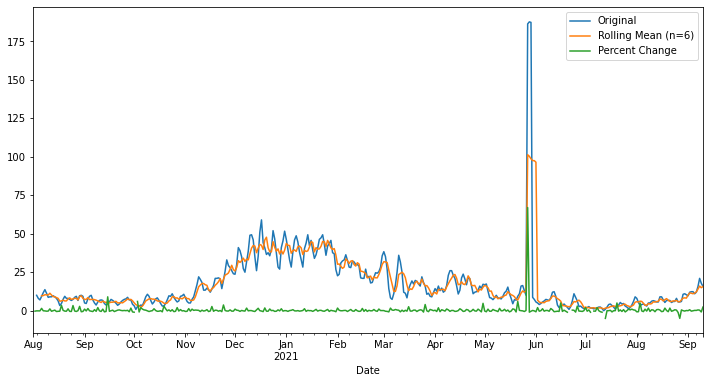

In [20]:
WINDOW = 6
fig, ax = plt.subplots()
ts.rolling(3).mean().plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)
ts.pct_change().plot(label='Percent Change',ax=ax)
ax.legend()

#### Running into inf values!

In [21]:
ts_pct_change = ts.pct_change()#.dropna()
(ts_pct_change == np.inf).sum()

3

In [22]:
ts_pct_change.loc[ts_pct_change == np.inf]

Date
2020-10-02    inf
2021-06-22    inf
2021-07-05    inf
Name: Deaths-New, dtype: float64

In [23]:
## diagnose infinity values
idx_slice = slice('06-18-2021',"06-26-2021")

pd.concat([ts_pct_change.loc[idx_slice],ts.loc[idx_slice]],axis=1)
# display()
# display()
# ts_pct_change.loc['06-18-2021':"06-26-2021"]#.plot()

Deaths-New  Deaths-New
Date                              
2021-06-18    0.333333         4.0
2021-06-19   -0.375000         2.5
2021-06-20   -1.000000         0.0
2021-06-21         NaN         0.0
2021-06-22         inf         8.0
2021-06-23    0.375000        11.0
2021-06-24    0.272727        14.0
2021-06-25   -0.928571         1.0
2021-06-26    3.000000         4.0

#### Notes: dealing with inf values

- Replace `np.inf` with `np.nan`



In [24]:
ts_pct_change = ts_pct_change.replace({np.inf:np.nan,
                                      -np.inf:np.nan})
ts_pct_change

Date
2020-08-01         NaN
2020-08-02   -0.307692
2020-08-03   -0.111111
2020-08-04   -0.125000
2020-08-05   -0.142857
                ...   
2021-09-06    0.166667
2021-09-07    0.500000
2021-09-08    0.333333
2021-09-09   -0.839286
2021-09-10    2.333333
Freq: D, Name: Deaths-New, Length: 406, dtype: float64

In [25]:
def calc_perc_change(ts,periods=1,replace_inf_with_nan=True):
    """Calculated the pct_change with pandas and optionall replaces inf values"""
    ts_pct_change = ts.pct_change(periods=periods)#
    
    if replace_inf_with_nan:
        ts_pct_change = ts_pct_change.replace({np.inf:np.nan,
                                      -np.inf:np.nan})

    return ts_pct_change

<AxesSubplot:xlabel='Date'>

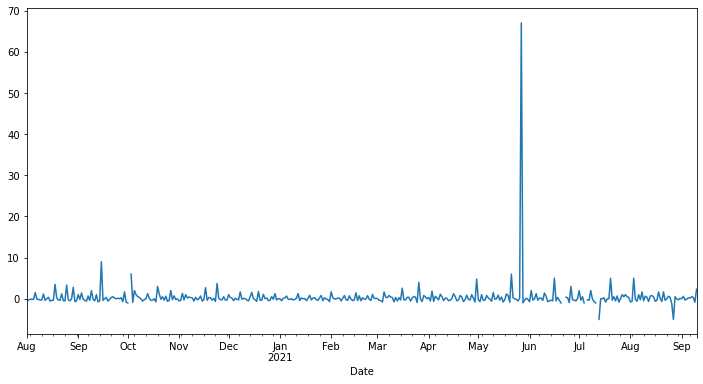

In [26]:
ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot()

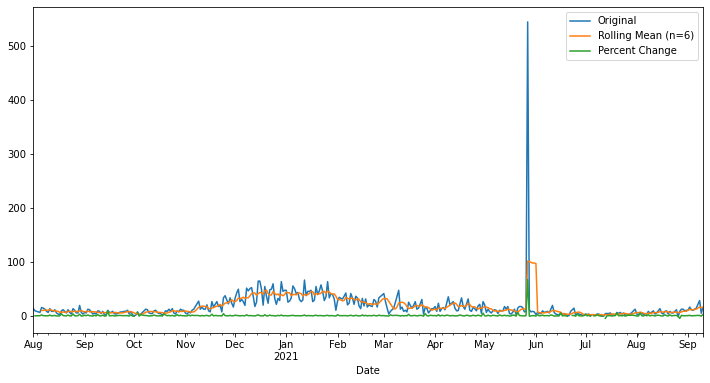

In [27]:
## Visualizing OUtliers + Percent Change
WINDOW = 6
fig, ax = plt.subplots()
ts.plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)

ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot(label='Percent Change',ax=ax)
ax.legend()

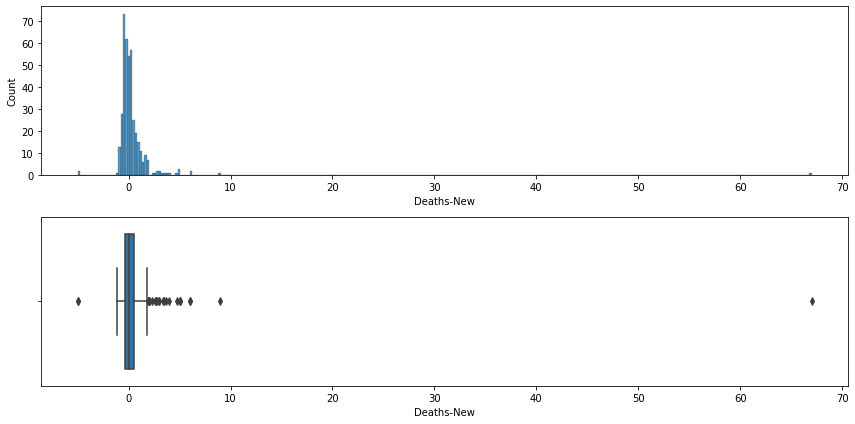

In [28]:
fig,axes = plt.subplots(nrows=2)
sns.histplot(x=ts_pc_ch,ax=axes[0])
sns.boxplot(x=ts_pc_ch,ax=axes[1])
fig.tight_layout()

In [29]:
# ts_pc_ch = calc_perc_change(ts)
# ts_pc_ch.loc[ts_pc_ch.abs()>20]

### developing `remove_outliers_ts`

In [30]:
def remove_outliers_ts(ts_,threshold_type='pct_change',raw_thresh=100,
                       pct_thresh=50, n_diff=1,fill_method='interpolate'):
    """ Remove outliers from time series.
    
    Parameters:
        - ts 
        - threshold_type {'raw',('pct_change','%'),('zero','0')}
        - raw_thresh 
        - pct_thresh
        - n_diff (1) - period for .diff or .pct_change
    """
    
    if isinstance(ts_, pd.Series):
        ts_df = ts_.to_frame(ts_.name)
    else:
        ts_df = ts_.copy()
    
    ## sve copy to remove outleirs from
    ts_out = ts_df.copy()
    
    for col in ts_df.columns:
        ts = ts_df[col].copy()
        
        ## use threshold techniques to identify outleirs
        if threshold_type == 'raw':
            ## saving deltas 
            deltas  = ts.diff(n_diff)
            idx_outliers = deltas.abs()>raw_thresh

        elif (threshold_type == '%') | (threshold_type == 'pct_change'):
            deltas = calc_perc_change(ts,periods=n_diff)
            idx_outliers = deltas.abs() > pct_thresh


        elif (threshold_type == 'zero') | (threshold_type == '0'): 
            deltas = ts.copy()
            idx_outliers = ts == 0
        else:
            raise Exception("Other threshold_kinds are not yet implemented.")


        ## SSaving outleirs
        outliers = deltas[idx_outliers]


        ## Filling in outliers
#         ts_out = ts.copy()
        ts_out[col].loc[outliers.index] = np.nan
    
    
    

        ## Deal with null values:
        if fill_method == 'interpolate':
            ts_out[col] = ts_out[col].interpolate()

        elif fill_method == None:
            pass

        else:
            ts_out[col] = ts_out[col].fillna(method=fill_method)

    
    return ts_out
     
    


In [31]:
# test_df = get_state_df_ts(DF,'MD',agg_func= 'mean',ts_col=selected_cols,
#                           rename_cols=False,fill_method='interpolate',
#                           diagnose=False)#state_first=False)

# test_df['Cases-New'].plot()

In [32]:
# clean_df = remove_outliers_ts(test_df['Cases-New'],fill_method='interpolate',threshold_type="0")
# clean_df.plot()

In [33]:
# test_df.plot()

In [34]:
# ts =test_df['Deaths-New'].copy()
# ts_clean = remove_outliers_ts(ts,threshold_type='%')

# ax = ts.plot(label='Original')
# ts_clean.plot(label='Clean',ax=ax)
# ax.legend()

In [35]:
# fig, axes = plt.subplots(nrows=2)

# test_df = get_state_df_ts(DF,'MD',agg_func= 'mean',ts_col=selected_cols,
#                           rename_cols=False,fill_method='interpolate',
#                           diagnose=False)#state_first=False)

# test_df_clean = remove_outliers_ts(test_df,threshold_type='%')

# test_df.plot(title='Original',ax=axes[0])
# test_df_clean.plot(title='Clean',ax=axes[1])
# # ax.legend()

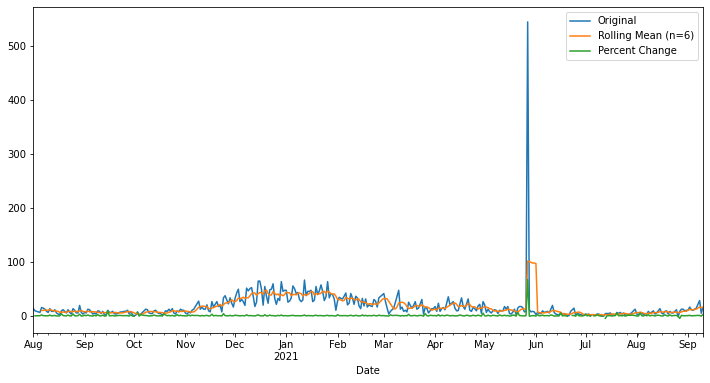

In [36]:
## Visualizing OUtliers + Percent Change
WINDOW = 6
fig, ax = plt.subplots()
ts.plot(label='Original',ax=ax)
ts.rolling(WINDOW).mean().plot(label=f'Rolling Mean (n={WINDOW})',ax=ax)

ts_pc_ch = calc_perc_change(ts)
ts_pc_ch.plot(label='Percent Change',ax=ax)
ax.legend()

### write `get_state_df_ts_final` (will replace original `get_state_df_ts` when completed)


In [37]:
# fs.ihelp(remove_outliers_ts)

In [38]:
## to replace af.get_state_ts



### BEST VERSION YET! 09/12 ######
def get_state_df_ts_final(STATES, state_name,ts_col=None,group_col='state',# legacy compatible
                     freq='D', start_date='08-2020', agg_func='mean', #formerly sum
                    fill_nans=True, fill_method='interpolate',
                    rename_cols=True,name_sep=' - ',state_first=False,
                    remove_outliers=True,  n_diff=1, threshold_type='pct_change',
                      raw_thresh=100, pct_thresh=50, 
                          diagnose=True):
    """Take df_us and extracts state's data as then Freq/Aggregation provided
    
    
    Paramters:
    
        - DF
        - state_name
        - ts_col
        - group_col
        - freq 
        - start_date
        - agg_func
        -  fill_nans
        - fill_method
        
        
    Note on order:
    1. make state_df
    2. resample and aggregate
    3. slice start_date
    4. Select columns
    5. Remove Outliers
    6. Fill Null values
    7. Rename columns
    
    """
    ## Get default arguments for try/except
    import inspect
    args = inspect.signature(get_state_df_ts)
    args = {k:v.default for k,v in args.parameters.items()}  
    
    
    ## Slice state_df depending on which datatype 
    if isinstance(STATES,dict):
        state_df = STATES[state_name].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        state_df = STATES.loc[state_name].copy()

    else:
        ## Get state_df group
        state_df = STATES.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

        
        
    ## visualize pre-resampling
    if diagnose:
        pfig = px.line(state_df,title='Pre-Resampling')
        pfig.show()
    

    ## Resampling and Aggregating 
    if agg_func=='as_freq':
        try:
            state_df = state_df.resample(freq).asfreq(freq)
        except Exception as e:

            agg_func = args['agg_func']
            state_df = state_df.resample(freq).agg(agg_func)
            print(f"[!] Erorr using agg_func='as_freq'; Using default agg_func ('{agg_func}') instead.")
            print('\tError message below:')
            print("\t",e)        
            
    elif agg_func is None:
        pass
    
    else:
        state_df = state_df.resample(freq).agg(agg_func)
        
        
    ## Slice out time period desired.
    state_df = state_df.loc[start_date:]
    
    
    ## Return only columns containing ts_cols
    if ts_col is not None:

        if isinstance(ts_col,str):
            ts_col = [ts_col]

        # find cols that end with the column name
        selected_cols=[]
        for col in ts_col:
            selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
        state_df = state_df[selected_cols]
        
        
    ## Remove Outleirs
    if remove_outliers:
        
        if isinstance(threshold_type,str):
            threshold_type= [threshold_type]
            
        for thresh_type in threshold_type:
            state_df = remove_outliers_ts(state_df,threshold_type=thresh_type,
                                         raw_thresh=raw_thresh,pct_thresh=pct_thresh,
                                         n_diff=n_diff,fill_method=fill_method)
        
   
    
    ## Deal with reamaining  null values:  (REMOVE??)
    if fill_method == 'interpolate':
        state_df = state_df.interpolate()
        
    elif fill_method == None:
        pass
    
    else:
        state_df = state_df.fillna(method=fill_method)
    
        

     ## Rename columns with state name
    if rename_cols == True:
    
        ## Get and Rename Sum Cols 
        orig_cols = state_df.columns

        for col in orig_cols:

            if state_first==True:
                new_col_name = f"{state_name}{name_sep}{col}"
            else:
                new_col_name = f"{col}{name_sep}{state_name}"

            state_df[new_col_name] = state_df[col].copy()

        ## Drop original cols
        state_df.drop(orig_cols,axis=1,inplace=True)
    

    ## Visualize post-resampling 
    if diagnose:
            pfig = px.line(state_df,title="post-Resampling")
            pfig.show()

    
    
    return state_df

In [39]:
def compare_cols_post_outlier_removal():
    """Quick Function to compare preprcoessing with get_state_df_ts_final
    across all columns (pair-wise)"""
    



    test_df_raw = get_state_df_ts_final(DF,'MD',agg_func= 'sum',ts_col=selected_cols,
                              rename_cols=False,fill_method='interpolate',
                                    remove_outliers=False, threshold_type=['%','0'],
                              diagnose=False)#state_first=False)
    
    test_df_clean = get_state_df_ts_final(DF,'MD',agg_func= 'sum',ts_col=selected_cols,
                              rename_cols=False,fill_method='interpolate',
                                    remove_outliers=True, threshold_type=['0','%'],
                              diagnose=False)#state_first=False)

    nrows = len(test_df_raw.columns)
    fig, axes = plt.subplots(nrows=nrows,figsize=(12,4*nrows))
    
    for i,col in enumerate(test_df_clean.columns):
        test_df_raw[col].plot(ax=axes[i],ls="--",label=f'{col}-Raw')
        test_df_clean[col].plot(ax=axes[i],ls=":",label=f"{col}Clean")
        axes[i].legend()

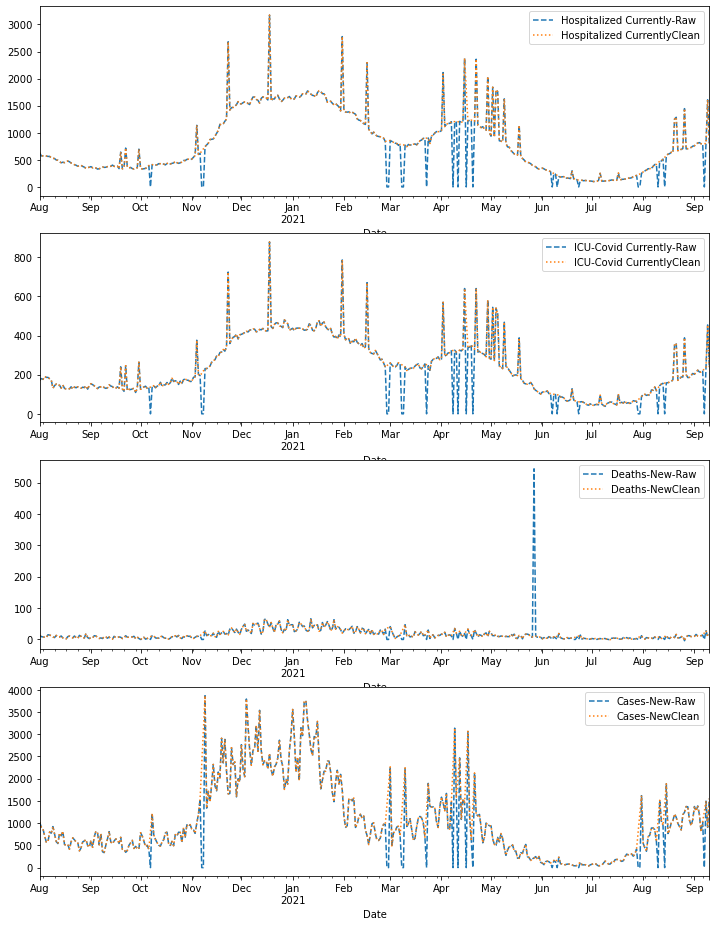

In [40]:
compare_cols_post_outlier_removal()

In [41]:
# ts_clean = remove_outliers_ts(test_df,threshold_type='%',pct_thresh=5)
# ax = test_df.plot(title='Original',ax=axes[0])

# ts_clean.plot(title='Clean',ax=axes[1])
# ax.legend()
# ts_clean

### Using New Functions in `get_states_to_plot`

In [42]:
get_ts_df_kwargs = dict(agg_func= 'mean',
              rename_cols=True,fill_method='interpolate',
              remove_outliers=False, state_first=False,
              threshold_type=['0','%'], diagnose=False)

state_list = DF.index.get_level_values(0).unique()

def get_states_to_plot(DF,state_list=["NY",'MD','TX','PA', 'FL'],
                       plot_cols=None, 
                      agg_func= 'mean',
              rename_cols=True,fill_method='interpolate',
              remove_outliers=False, state_first=False,
              threshold_type=['0','%'], diagnose=False):
    
    get_states_kwargs = dict(rename_cols=rename_cols,
                          fill_method=fill_method,
                          state_first=state_first,
                           threshold_type=threshold_type,
                          diagnose=diagnose)
    
    if state_list is None:   
        if isinstance(DF,pd.DataFrame):
            state_list = list(DF.index.get_level_values(0).unique())
    
        elif isinstance(DF,dict):
            state_list = list(sorted(DF.keys()))
    
    ## Get each state
    dfs_to_concat = []
    for state in state_list:
        dfs = get_state_df_ts_final(DF,state,ts_col=plot_cols,**get_states_kwargs)
        dfs_to_concat.append(dfs)
        
        
     ## Concatenate final dfs
    try:
        plot_df = pd.concat(dfs_to_concat,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
        new_order = sorted(plot_df.columns.to_list())
        plot_df = plot_df[new_order]
    except:
        print('[!] pd.concat failed, returning list...')
        plot_df = dfs_to_concat
    return plot_df

In [125]:

plot_df = get_states_to_plot(DF,state_list=None,plot_cols=['Cases-New','Death-New'],
                            agg_func= 'mean',
                  rename_cols=True,fill_method='interpolate',
                  remove_outliers=False, state_first=True,
                  threshold_type=['0','%'], diagnose=False)
plot_df

AK - Cases-New  AL - Cases-New  ...  WV - Cases-New  WY - Cases-New
Date                                        ...                                
2020-08-01           152.0          2033.0  ...           159.0            43.0
2020-08-02           145.0          1159.0  ...           120.0            39.0
2020-08-03            78.0          1044.0  ...           120.0            40.0
2020-08-04            69.0           955.0  ...            81.0            36.0
2020-08-05            60.0          1866.0  ...           103.0            39.0
...                    ...             ...  ...             ...             ...
2021-09-07          2148.0          2672.0  ...          1008.0          1289.0
2021-09-08           421.0          4791.0  ...          1352.0           802.0
2021-09-09           842.0          4367.0  ...          1743.0           533.0
2021-09-10           701.0          6830.5  ...          2380.0           813.0
2021-09-11           701.0          9294.0  ...          2262.0           813.0

[407 rows x 52 columns]

In [126]:
px.line(plot_df)#[c for c in plot_df.columns if c.endswith('Cases-New')]])

### Map of US Stats for time period

In [45]:
import datetime as dt
today = dt.date.today()
end_state = today
start_date = pd.Timestamp(today) - pd.Timedelta('90 days')
start_date

Timestamp('2021-06-14 00:00:00')

### Cases in the Last 90 Days

In [46]:
cases_df = get_states_to_plot(DF,state_list=None,plot_cols='Cases-New',
                             agg_func= 'mean',
                      rename_cols=True,fill_method='interpolate',
                      remove_outliers=True, state_first=True,
                      threshold_type=['0','%'], diagnose=False)

cases_df.columns = [c.split(' - ')[0] for c in cases_df.columns]
cases_df = cases_df.loc[start_date:end_state]
cases_df

AK      AL      AR      AZ  ...       WA      WI       WV      WY
Date                                        ...                                  
2021-06-14    65.0   550.0   248.0   394.0  ...    556.0   201.0   205.00   120.0
2021-06-15    59.0   290.0   405.0   423.0  ...    433.0   130.0    77.00    69.0
2021-06-16    53.0   160.0   288.0   436.0  ...    531.0    36.0    90.00    56.0
2021-06-17    79.0   247.0   288.0   332.0  ...    438.0   109.0    62.75    66.0
2021-06-18   105.0   334.0   276.0   364.0  ...    558.0   122.0    35.50    65.0
...            ...     ...     ...     ...  ...      ...     ...      ...     ...
2021-09-07  2148.0  2672.0   583.0  1982.0  ...  11204.0   859.0  1008.00  1289.0
2021-09-08   421.0  4791.0  2181.0  2222.0  ...   3587.0  2533.0  1352.00   802.0
2021-09-09   842.0  4367.0  2481.0  2480.0  ...   4063.0  2096.0  1743.00   533.0
2021-09-10   701.0  6830.5  3194.5  2988.0  ...   3388.0  2777.0  2380.00   813.0
2021-09-11   701.0  9294.0  3908.0  3355.0  ...   3388.0  2777.0  2262.00   813.0

[90 rows x 52 columns]

In [47]:
# map_cols = ['Deaths-New','Cases-New','ICU-Covid Currently',]


In [48]:
sum_new_cases = cases_df.sum().reset_index()
sum_new_cases.columns= ['state','Cases-New']
sum_new_cases.head()

state  Cases-New
0    AK    44125.0
1    AL   248970.0
2    AR   144126.0
3    AZ   165271.0
4    CA   690500.0

In [49]:
color_column = 'Cases-New'
map_ = px.choropleth(sum_new_cases,color=color_column,locations='state',
#               hover_data=['Confirmed','Deaths','Recovered'], 
#               hover_name='state',
              locationmode="USA-states", scope='usa', title="Total {} Cases by State".format(color_column),
              color_continuous_scale=px.colors.sequential.Reds)
map_.show(config={'scrollZoom':False})

In [50]:
import datetime as dt
def map_columns(DF,col='Cases-New',last_n_days=90,
               map_metric='sum',plot_map=True):
    """
    """
    today = dt.date.today()
    end_date = today
    start_date = pd.Timestamp(today) - pd.Timedelta(f'{last_n_days} days')

    plot_df = get_states_to_plot(DF,state_list=None, plot_cols=col,
                             agg_func= 'mean',
                      rename_cols=True,fill_method='interpolate',
                      remove_outliers=True, state_first=True,
                      threshold_type=['0','%'], diagnose=False)

    plot_df.columns = [c.split(' - ')[0] for c in plot_df.columns]
    plot_df = plot_df.loc[start_date:end_date]
    
    
    
    agg_data = cases_df.agg(map_metric).reset_index()
    agg_data.columns= ['state',col]
    
    if plot_map:
        color_column = col
        map_ = px.choropleth(agg_data,color=color_column,locations='state',
                      locationmode="USA-states", scope='usa', 
                             title=f"{map_metric.title()} {col} by State (Last {last_n_days} Days)",#.format(color_column),
                      color_continuous_scale=px.colors.sequential.Reds)
        map_.show(config={'scrollZoom':False})
    else:
        return agg_data
    

In [51]:
## Prototype cell to turn into function for app
map_columns(DF,last_n_days=30,map_metric='mean')


rank = map_columns(DF,last_n_days=7,map_metric='sum',plot_map=False)
rank = rank.sort_values('Cases-New',ascending=False)
rank["Rank"] = range(1,len(rank)+1) #.reset_index(drop=True)
rank = rank.set_index('Rank')
rank.head().style.format({'Cases-New':"{:,.0f}"})

In [52]:
map_columns(DF,last_n_days=90,map_metric='sum')

In [53]:
map_columns(DF,last_n_days=7,map_metric='sum')

## BOOKMARK 09/12

- I recommend adding back the population-adjusted data using the kaggle dataset from the prior dashboard

In [54]:
# raise Exception('Currently focused on EDA above. Stopping before modeling begings.')

# Selected States [Prior to 09/12/21]

## FL

In [55]:
FL = STATES['FL'].copy()
FL

Deaths    Cases  ...  Deaths-New  Cases-New
Date                         ...                       
2020-03-12       2       30  ...         0.0        0.0
2020-03-13       2       50  ...         0.0       20.0
2020-03-14       2       76  ...         0.0       26.0
2020-03-15       3      100  ...         1.0       24.0
2020-03-16       3      101  ...         0.0        1.0
...            ...      ...  ...         ...        ...
2021-09-02   43979  3223249  ...         0.0        0.0
2021-09-03   46324  3352451  ...      2345.0   129202.0
2021-09-04   46324  3352451  ...         0.0        0.0
2021-09-05   46324  3352451  ...         0.0        0.0
2021-09-06   46324  3352451  ...         0.0        0.0

[543 rows x 6 columns]

In [56]:
## first non-null hospital timestamps
first_ts = FL[FL['Hospitalized Currently'].notna()].index[0]
first_ts

Timestamp('2020-03-12 00:00:00')

### Calc Delta Cases/Deaths

In [57]:
FL.columns

Index(['Deaths', 'Cases', 'Hospitalized Currently', 'ICU-Covid Currently',
       'Deaths-New', 'Cases-New'],
      dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

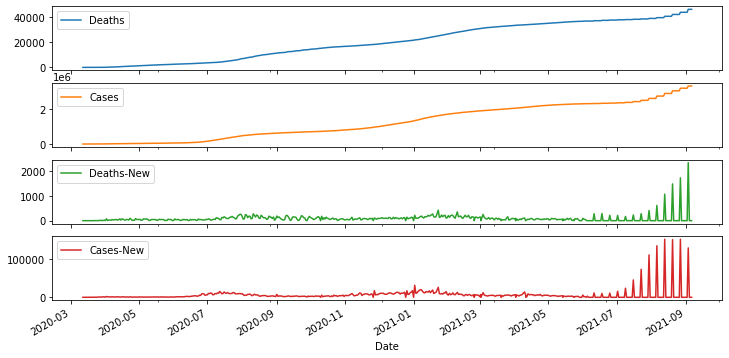

In [58]:
## Plot deaths/cases
cumulative_cols = [c for c in FL.columns for name in ['Deaths','Cases']if name in c]
FL[cumulative_cols].plot(subplots=True)

In [59]:
import plotly
plotly.__version__

'5.3.1'

<AxesSubplot:>

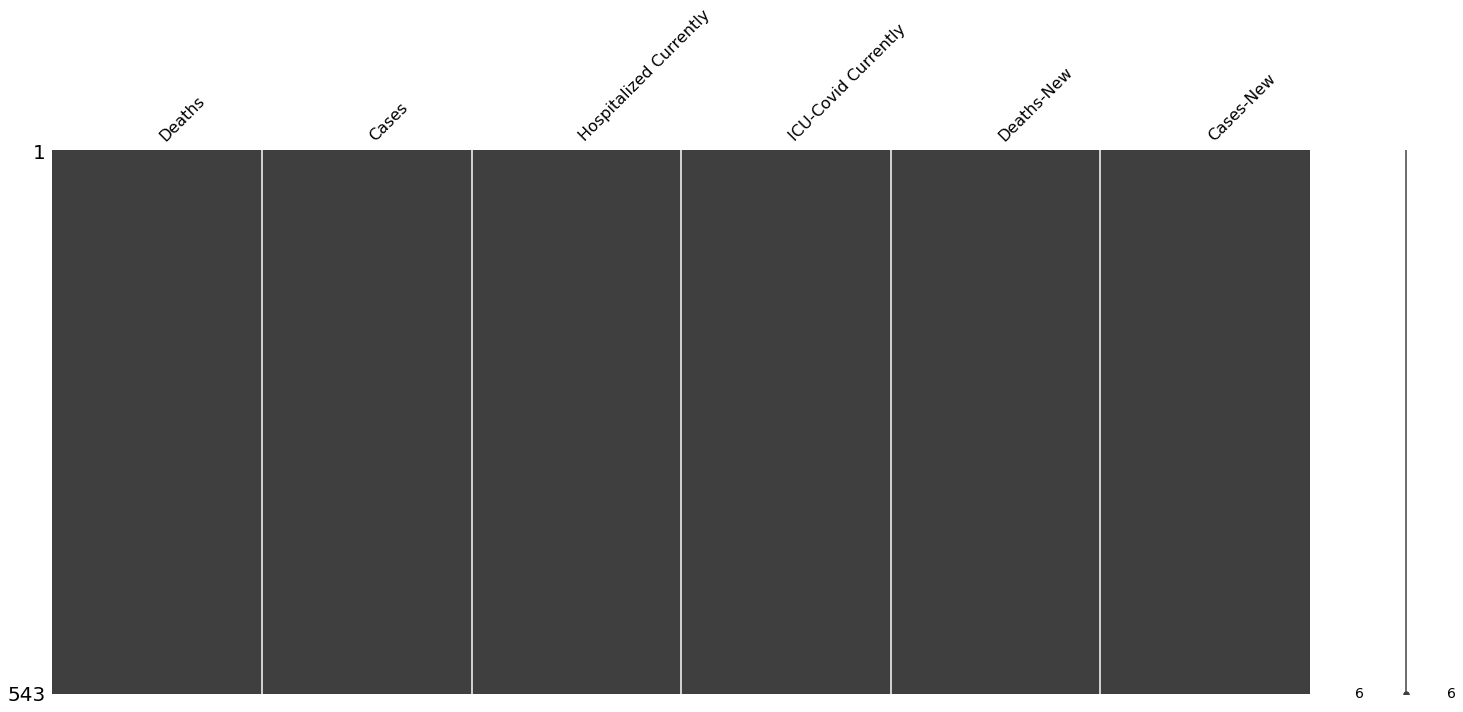

In [60]:
import missingno
missingno.matrix(FL)

In [61]:
# px.imshow(FL.isna(),template='plotly_dark',color_continuous_scale="Reds")

In [62]:
plot_cols = FL.drop(columns=cumulative_cols).columns
plot_cols

Index(['Hospitalized Currently', 'ICU-Covid Currently'], dtype='object')

In [63]:
import plotly 
plotly.__version__

'5.3.1'

In [64]:
pfig = px.line(FL,y=plot_cols,width=1000,title="FL Data")
pfig.add_vline(first_ts,line_width=3,line_dash="dash",name='Start')
pfig.show()

In [65]:
# raise Exception('end of 09/01/21, though below code is still good.')

# Time Series Modeling

In [66]:
### FORECAST SPECIFIC FUNCTIONS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

## MD

In [67]:
state = "MD"
df_state = STATES[state].loc['08-2020':].copy()
# df_state = df_state.interpolate('time')
# df_state['Deaths-New'] = df_state['Deaths'].diff()
# df_state['Cases-New'] = df_state['Cases'].diff()
df_state = df_state.resample('D').sum()

print(df_state.isna().sum())
df_state

Deaths                    0
Cases                     0
Hospitalized Currently    0
ICU-Covid Currently       0
Deaths-New                0
Cases-New                 0
dtype: int64


Deaths   Cases  ...  Deaths-New  Cases-New
Date                        ...                       
2020-08-01    3506   89365  ...        13.0     1019.0
2020-08-02    3515   90274  ...         9.0      909.0
2020-08-03    3523   91144  ...         8.0      870.0
2020-08-04    3530   91854  ...         7.0      710.0
2020-08-05    3536   92426  ...         6.0      572.0
...            ...     ...  ...         ...        ...
2021-09-02   10040  499648  ...        16.0     1272.0
2021-09-03   10051  501035  ...        11.0     1387.0
2021-09-04   10061  502229  ...        10.0     1194.0
2021-09-05   10073  503034  ...        12.0      805.0
2021-09-06   10087  504061  ...        14.0     1027.0

[402 rows x 6 columns]

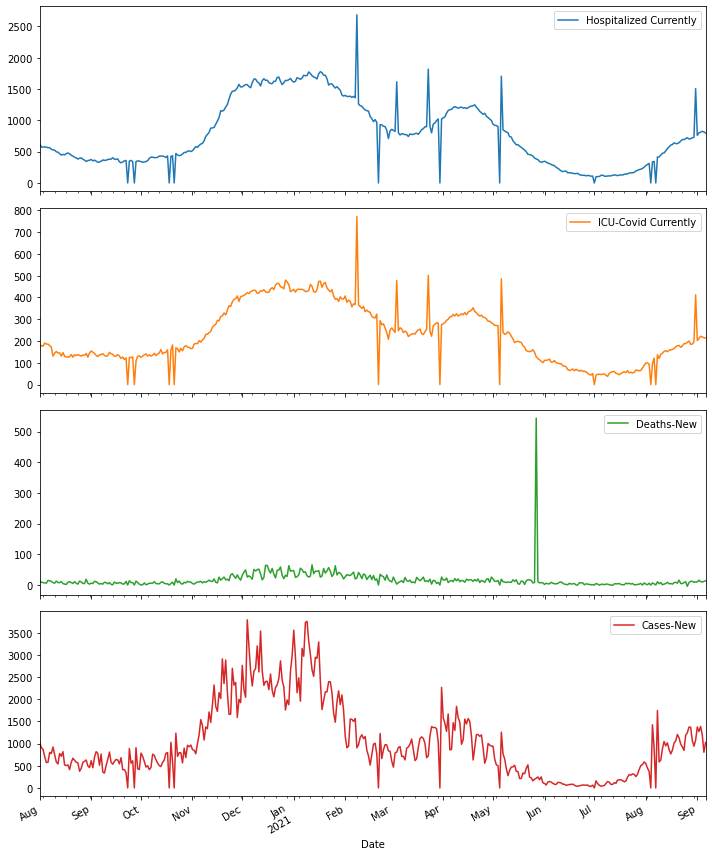

In [68]:
model_cols = ['Hospitalized Currently','ICU-Covid Currently',
              'Deaths-New','Cases-New'
             ]

## visualize
ax = df_state[model_cols].plot(subplots=True, figsize=(10,12))
plt.tight_layout();

#### Data Quality Issues
- There are strong spikes +/- that are not likely to be real values.

### MD - Cases-New

In [69]:
# col = 'Cases-New'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [70]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [71]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [72]:
# ax = decomp.seasonal.loc['01-2021'].plot(figsize=(12,5))
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [73]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [74]:
# fn.modeling.plot_acf_pacf(train,);

In [75]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [76]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [77]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [78]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

### MD - Hospitalized Currently

In [79]:
# df_state['Hospitalized Currently']

In [80]:
# col = 'Hospitalized Currently'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [81]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [82]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [83]:
# ax = decomp.seasonal.loc['01-2021'].plot()
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [84]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [85]:
# fn.modeling.plot_acf_pacf(train,);

In [86]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [87]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [88]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [89]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

## 🚨 BOOKMARK: Data Quality Issue - Deaths

- To Do: Remove outliers.
    - Try using .diff() and a high threshold for deterining outliers

### MD - Deaths-New

Text(0, 0.5, 'Deaths-New')

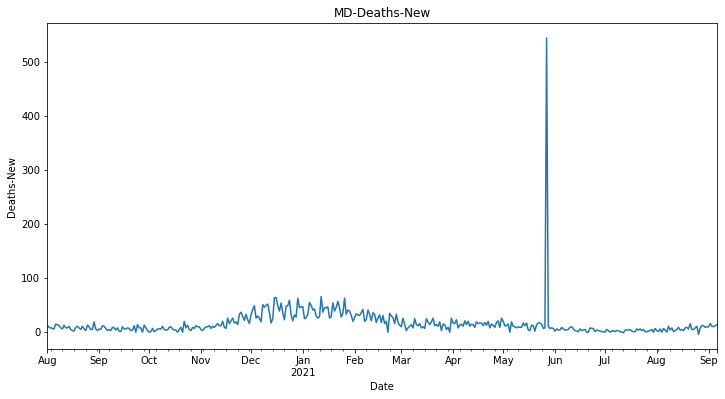

In [90]:
col = 'Deaths-New'
ts = df_state[col].copy()
ax = ts.plot(title=f"{state}-{col}");
ax.set_ylabel(col)

In [91]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

In [92]:
outliers= deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

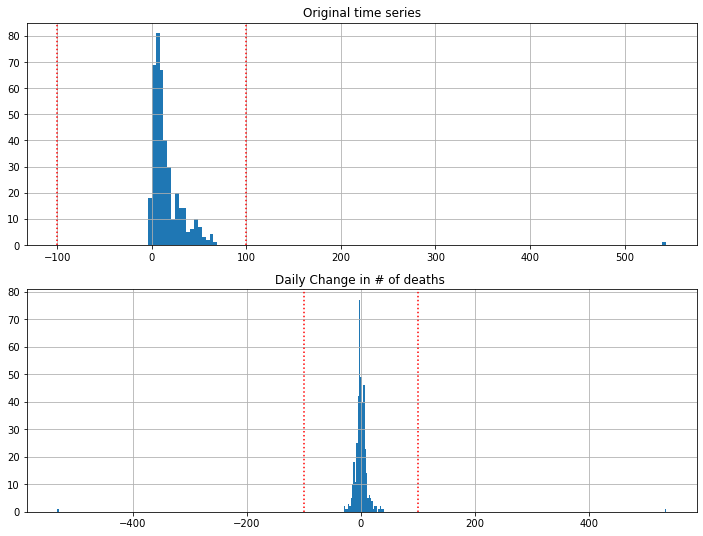

In [93]:
## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))
ax0 = ts.hist(bins='auto',ax=axes[0])
ax0.set(title='Original time series')

## saving deltas 
ax1 = deltas.hist(bins='auto',ax=axes[1])
ax1.set(title='Daily Change in # of deaths ');

for ax in axes:
    ax.axvline(threshold,ls=':',c='red')
    ax.axvline(-threshold,ls=':',c='red')

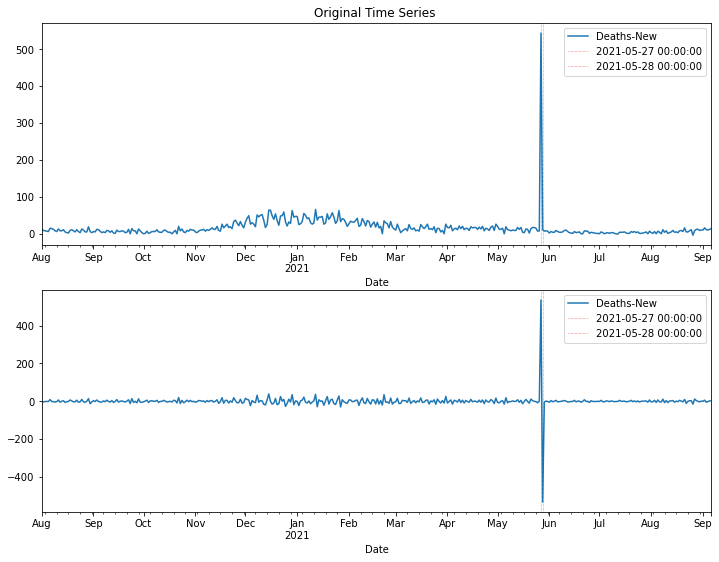

In [94]:
## Plotting High Deltas on original time seires

## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))

ax =axes[0]
ts.plot(ax = ax)
ax.set(title='Original Time Series ')

deltas.plot(ax=axes[1])
for ax in axes:
    [ax.axvline(x_val,label=x_val,lw=0.5,ls = ':',color='red') for x_val in outliers.index]
    ax.legend()



> The issues seem to be entirely in the deltas and therefore 

<AxesSubplot:xlabel='Date'>

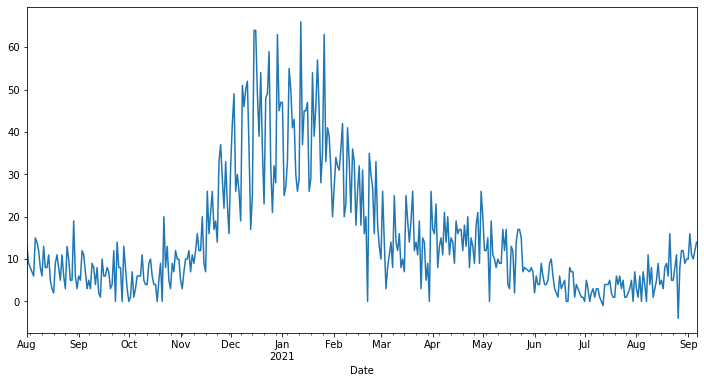

In [95]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]


## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

<AxesSubplot:xlabel='Date'>

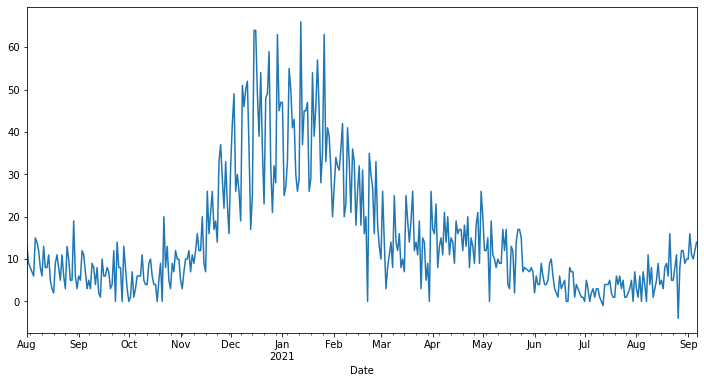

In [96]:

## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

In [97]:
# raise Exception('Deal with the data quality issue above')

#### Train Test Split

Using a cutoff index of -30, which = 08-08-2021


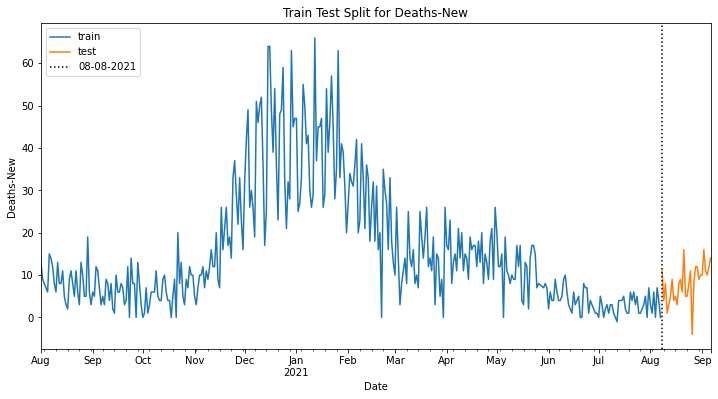

In [98]:
train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

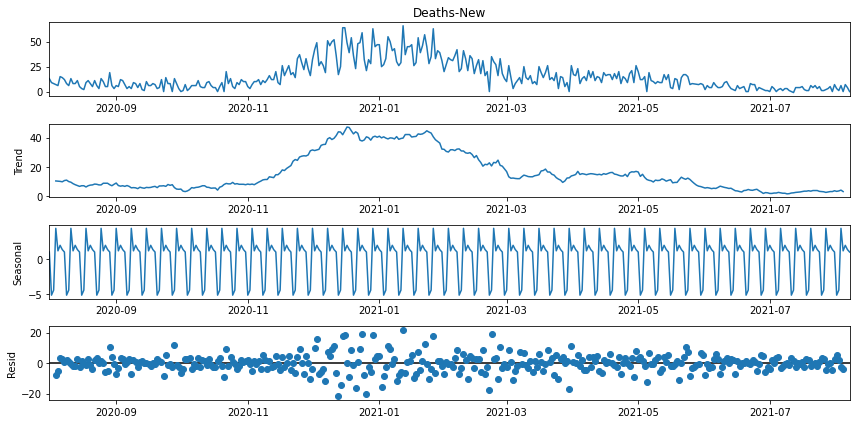

In [99]:
## Get Decomposed time sereis
decomp = tsa.seasonal_decompose(train)
decomp.plot();

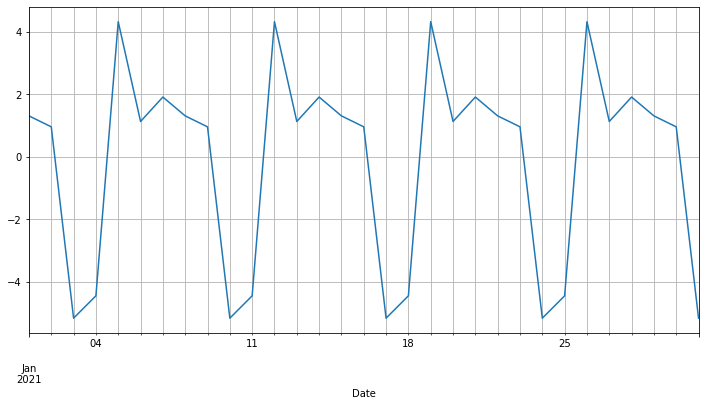

In [100]:
ax = decomp.seasonal.loc['01-2021'].plot()
ax.grid(which='both')

- Seasonality appears to be ~7 days

Test Statistic  #Lags Used  ...  p<.05  Stationary?
AD Fuller Results        -3.51631          14  ...   True         True

[1 rows x 6 columns]

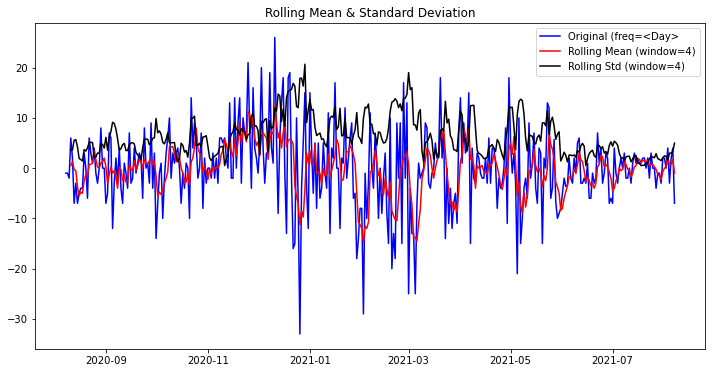

In [101]:
fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

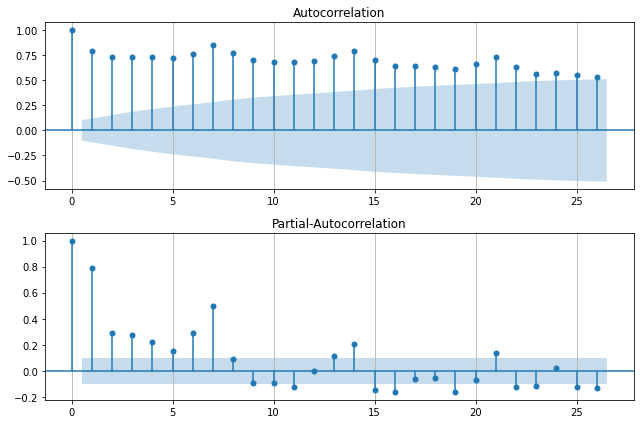

In [102]:
fn.modeling.plot_acf_pacf(train,);

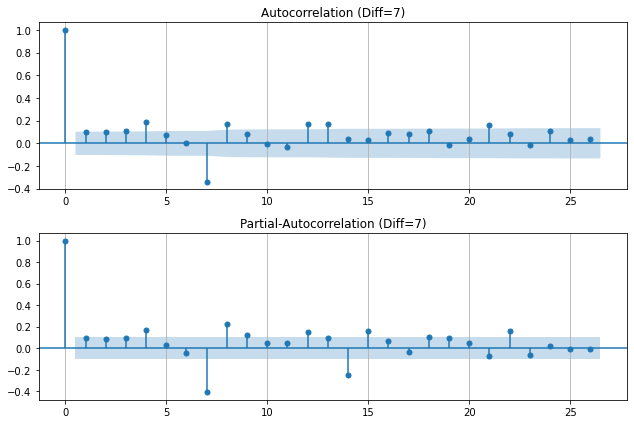

In [103]:
fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [104]:
from pmdarima import auto_arima

if RUN_MODELS==True:
    auto_model = auto_arima(train,m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    display(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2539.539, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2485.321, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2487.248, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2537.656, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2538.078, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2472.677, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=2474.285, Time=0.66 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=2478.332, Time=0.32 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2497.032, Time=0.37 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2452.048, Time=0.50 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=2478.275, Time=0.24 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=2453.897, Time=0.99 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2459.983, Time=0.35 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=2440.928, Time=0.65 sec
 ARIMA(3,0,0)(1,1,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  372
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1197.086
Date:                           Sun, 12 Sep 2021   AIC                           2402.171
Time:                                   15:28:30   BIC                           2417.771
Sample:                                        0   HQIC                          2408.371
                                           - 372                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9813      0.009    105.371      0.000       0.963       1.000
ma.L1         -0.8149      0.029    -27.747      0.000      -0.872      -0.757
ma.S.L7       -0.6743      0.035    -19.363      0.000      -0.743      -0.606
sigma2        40.8781      2.300     17.769      0.000      36.369      45.387
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.49
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.03
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Use Best Params for new SARIMAX

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Deaths-New   No. Observations:                  372
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1169.751
Date:                           Sun, 12 Sep 2021   AIC                           2347.501
Time:                                   15:28:30   BIC                           2363.001
Sample:                               08-01-2020   HQIC                          2353.667
                                    - 08-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9819      0.009    104.420      0.000       0.964       1.000
ma.L1         -0.8138      0.030    -27.244      0.000      -0.872      -0.755
ma.S.L7       -0.6752      0.035    -19.091      0.000      -0.745      -0.606
sigma2        41.5925      2.386     17.431      0.000      36.916      46.269
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                32.75
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

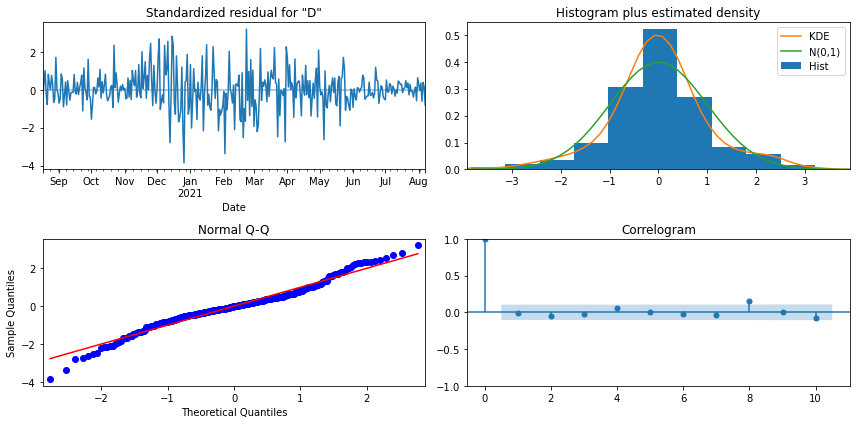

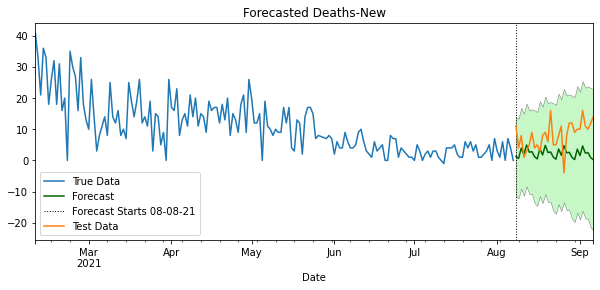

In [105]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Deaths-New   No. Observations:                  402
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1261.413
Date:                           Sun, 12 Sep 2021   AIC                           2530.825
Time:                                   15:28:31   BIC                           2546.648
Sample:                               08-01-2020   HQIC                          2537.100
                                    - 09-06-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9833      0.009    112.408      0.000       0.966       1.000
ma.L1         -0.8155      0.028    -28.958      0.000      -0.871      -0.760
ma.S.L7       -0.6843      0.033    -20.540      0.000      -0.750      -0.619
sigma2        40.1362      2.192     18.310      0.000      35.840      44.432
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                39.69
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

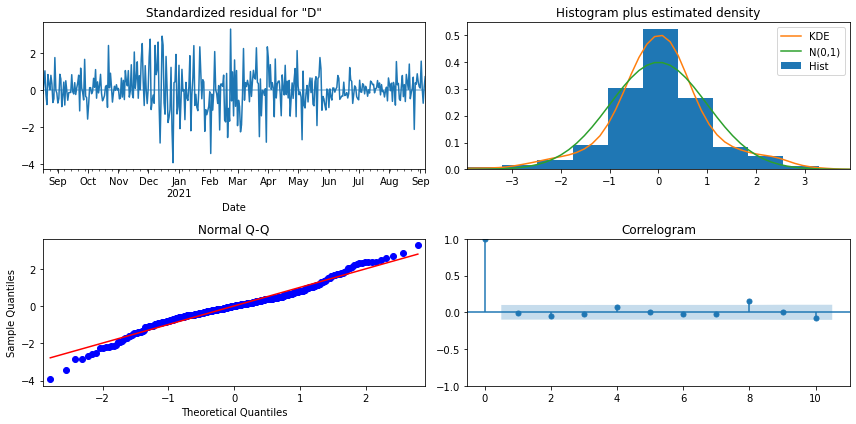

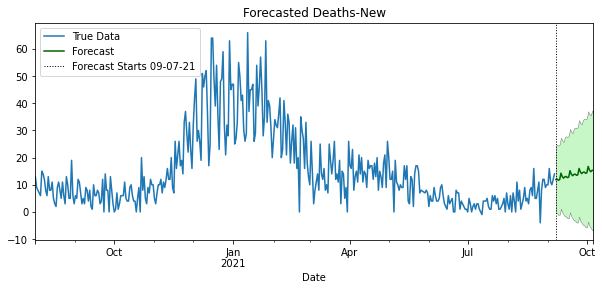

In [106]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)

# Function For Any Given State/ Column

<AxesSubplot:xlabel='Date'>

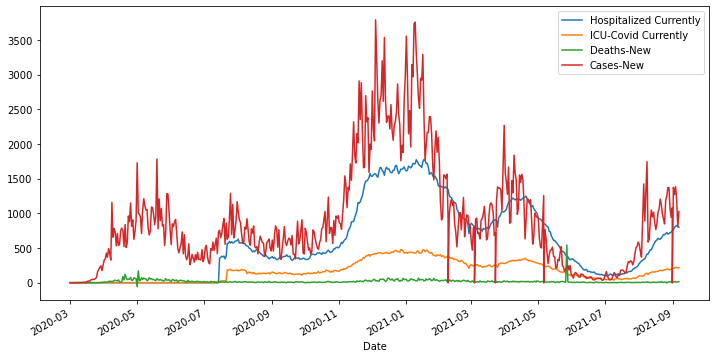

In [107]:
## test function
ts = STATES['MD'].copy()
ts.drop(['Deaths','Cases'],1).plot()

<AxesSubplot:xlabel='Date'>

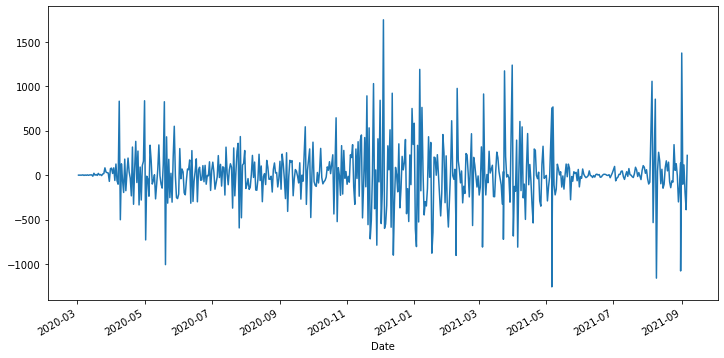

In [108]:
ts['Cases-New'].diff().plot()

In [109]:
# state = "NY"
# col = 'Deaths'#'Hospitalized Currently'
# start_date='08-2020'
# remove_outliers=True
# threshold=100
# plot=True


# df_state = STATES[state].loc[start_date:].copy()
# df_state = df_state.resample('D').sum()
# ts = df_state[col].copy()
# ts.index.name='Datetime'

# # ts = ts.resample('D').asfreq()
# ts

In [110]:
def make_timeseries_model(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,
                         plot=True):
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    

    ## Slicing out state df for index dates 
    df_state = STATES[state].loc[start_date:].copy()
    df_state = df_state.resample('D').sum()
    ts = df_state[col].copy()

    ## Outlier removal  #### REPLACE WITH HELPER FUNCTION
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
        
        

    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    
    
    

# End of 09/11/21 Work

	STARTING PDMDARIMA ARMA GRID SEARCH FOR NY - HOSPITALIZED CURRENTLY
		{
		m : 7
		trace : True
		D : 1
		start_p : 0
		start_q : 0
		start_P : 0
		start_Q : 0
	}
Using a cutoff index of -30, which = 08-08-2021


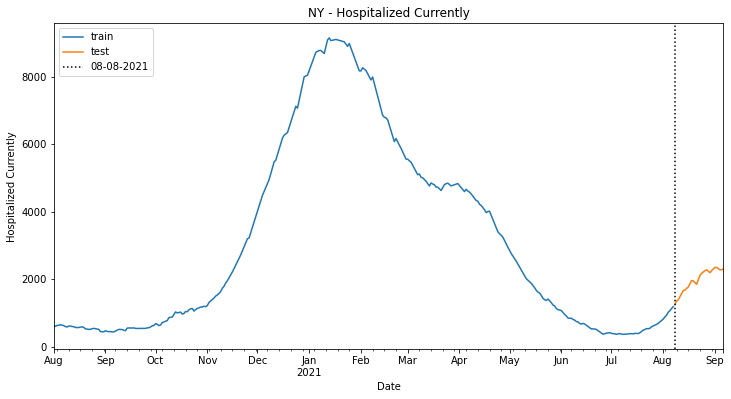

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4005.687, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3872.510, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3894.990, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3981.390, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=3866.354, Time=0.24 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.21 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=3860.674, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=3864.072, Time=0.20 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=3860.308, Time=1.08 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=3862.369, Time=0.38 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=3935.667, Time=0.34 sec
 ARIMA(2,1,0)(1,1,2)[7]             : AIC=3846.766, Time=1.25 sec
 ARIMA(2,1,0)(0,1,2)[7]             : AIC=3847.917, Time=0.59 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  372
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1894.639
Date:                           Sun, 12 Sep 2021   AIC                           3803.278
Time:                                   15:30:24   BIC                           3830.558
Sample:                                        0   HQIC                          3814.120
                                           - 372                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1024      0.078     14.175      0.000       0.950       1.255
ar.L2         -0.2103      0.061     -3.461      0.001      -0.329      -0.091
ar.L3          0.0871      0.064      1.363      0.173      -0.038       0.212
ma.L1         -0.7460      0.066    -11.257      0.000      -0.876      -0.616
ar.S.L7       -0.1263      0.040     -3.197      0.001      -0.204      -0.049
ma.S.L7       -0.7611      0.037    -20.630      0.000      -0.833      -0.689
sigma2      1907.9077     86.724     22.000      0.000    1737.931    2077.884
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               422.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.60
Prob(H) (two-sided):                  0.72   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  372
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1845.727
Date:                           Sun, 12 Sep 2021   AIC                           3705.454
Time:                                   15:30:24   BIC                           3732.539
Sample:                               08-01-2020   HQIC                          3716.230
                                    - 08-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1016      0.080     13.719      0.000       0.944       1.259
ar.L2         -0.2143      0.062     -3.429      0.001      -0.337      -0.092
ar.L3          0.0918      0.066      1.394      0.163      -0.037       0.221
ma.L1         -0.7412      0.069    -10.744      0.000      -0.876      -0.606
ar.S.L7       -0.1299      0.040     -3.223      0.001      -0.209      -0.051
ma.S.L7       -0.7591      0.038    -20.072      0.000      -0.833      -0.685
sigma2      1954.8632     91.360     21.397      0.000    1775.802    2133.925
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               394.62
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.60
Prob(H) (two-sided):                  0.33   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  402
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2002.287
Date:                           Sun, 12 Sep 2021   AIC                           4018.573
Time:                                   15:30:26   BIC                           4046.228
Sample:                               08-01-2020   HQIC                          4029.542
                                    - 09-06-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1280      0.078     14.435      0.000       0.975       1.281
ar.L2         -0.2615      0.062     -4.219      0.000      -0.383      -0.140
ar.L3          0.1115      0.062      1.797      0.072      -0.010       0.233
ma.L1         -0.7464      0.066    -11.299      0.000      -0.876      -0.617
ar.S.L7       -0.1101      0.039     -2.800      0.005      -0.187      -0.033
ma.S.L7       -0.7774      0.036    -21.795      0.000      -0.847      -0.707
sigma2      1957.5036     90.718     21.578      0.000    1779.699    2135.308
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               373.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.52
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

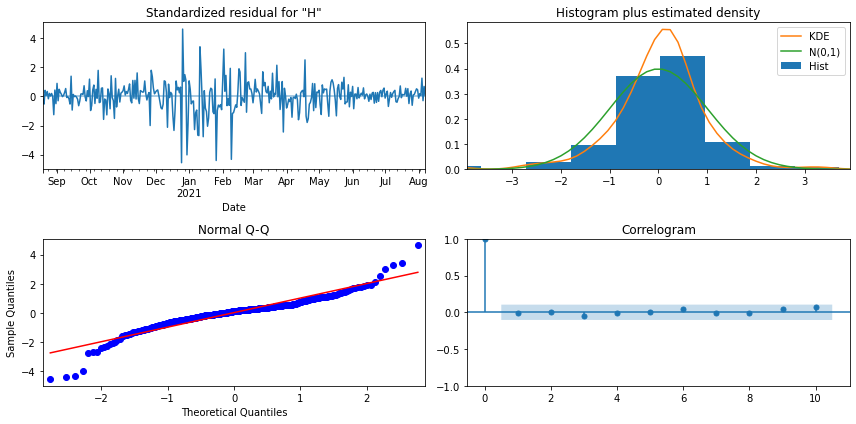

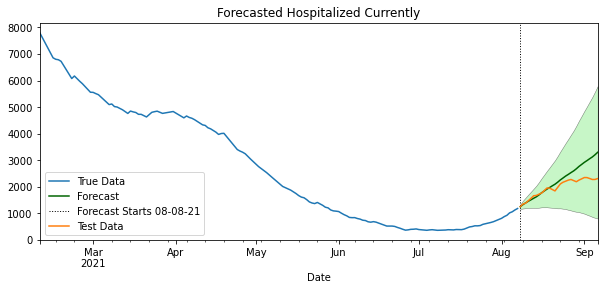

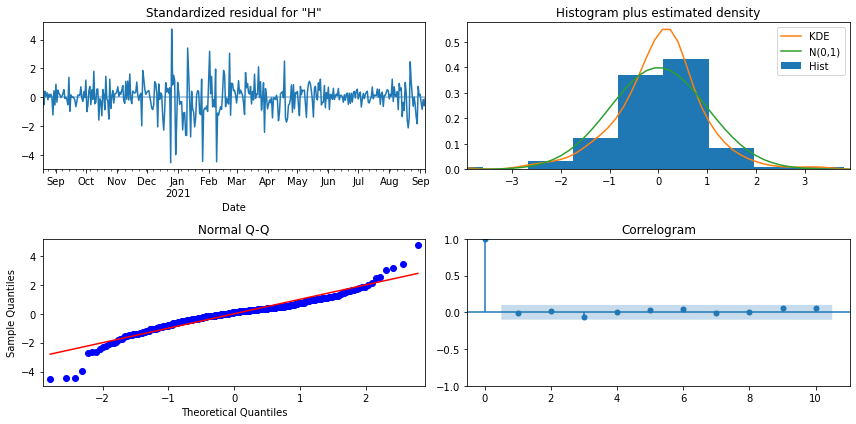

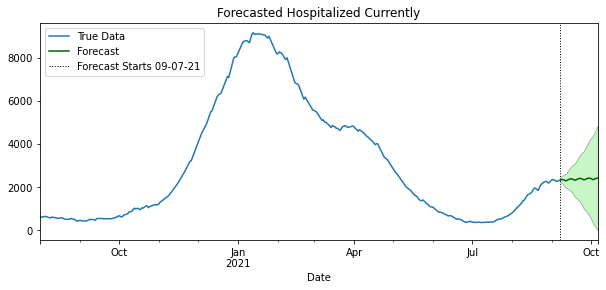

In [111]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model(STATES,'NY','Hospitalized Currently')


### Making Dict/DataFrame compatible `make_models_flexible`

- [ ] Replace `make_timeseries_model_flexible`'s data loading with `get_state_df_ts`

In [112]:
def make_timeseries_model_flexible(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,freq='D',
                         plot=True):
    
    
    
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    
    if isinstance(STATES,dict):
        df_state = STATES[state].loc[start_date:].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        df_state = DF.loc[state].loc[start_date:].copy()
        
    df_state = df_state.resample(freq).sum()
    ts = df_state[col].copy()

    

     #### Outlier removal  #### REPLACE WITH HELPER FUNCTION ####
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
     #### #### #### #### #### #### #### #### #### #### #### ####  
    
    
    
    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    

In [113]:
# raise Exception('Confusion below!')

	STARTING PDMDARIMA ARMA GRID SEARCH FOR NY - HOSPITALIZED CURRENTLY
		{
		m : 7
		trace : True
		D : 1
		start_p : 0
		start_q : 0
		start_P : 0
		start_Q : 0
	}
Using a cutoff index of -30, which = 08-13-2021


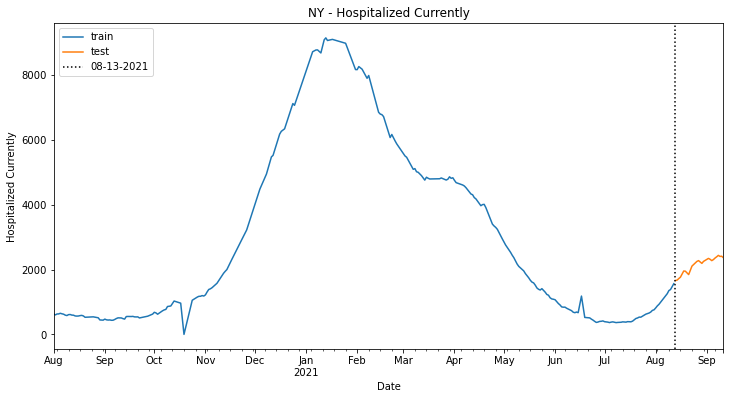

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4413.695, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=4248.605, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=4183.417, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=4323.546, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=4184.905, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=4185.011, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=4220.612, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=4301.117, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=4176.531, Time=0.37 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=4323.923, Time=0.09 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=4178.476, Time=0.67 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=4178.490, Time=1.06 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=4222.030, Time=0.17 sec
 ARIMA(1,1,1)(1,1,2)[7]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  377
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2084.265
Date:                           Sun, 12 Sep 2021   AIC                           4176.531
Time:                                   15:30:39   BIC                           4192.174
Sample:                                        0   HQIC                          4182.745
                                           - 377                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2817      0.031      8.971      0.000       0.220       0.343
ma.L1          0.3868      0.042      9.114      0.000       0.304       0.470
ma.S.L7       -0.7395      0.034    -21.540      0.000      -0.807      -0.672
sigma2      4641.7318    136.424     34.024      0.000    4374.345    4909.119
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3469.36
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -1.18
Prob(H) (two-sided):                  0.02   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  377
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2035.559
Date:                           Sun, 12 Sep 2021   AIC                           4079.119
Time:                                   15:30:39   BIC                           4094.663
Sample:                               08-01-2020   HQIC                          4085.299
                                    - 08-12-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2891      0.032      9.106      0.000       0.227       0.351
ma.L1          0.3872      0.043      8.996      0.000       0.303       0.472
ma.S.L7       -0.7486      0.035    -21.462      0.000      -0.817      -0.680
sigma2      4740.8892    142.250     33.328      0.000    4462.085    5019.693
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3301.53
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -1.16
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  407
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2195.882
Date:                           Sun, 12 Sep 2021   AIC                           4399.765
Time:                                   15:30:40   BIC                           4415.629
Sample:                               08-01-2020   HQIC                          4406.054
                                    - 09-11-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2909      0.030      9.603      0.000       0.232       0.350
ma.L1          0.3817      0.041      9.211      0.000       0.300       0.463
ma.S.L7       -0.7550      0.033    -23.093      0.000      -0.819      -0.691
sigma2      4521.0354    129.019     35.042      0.000    4268.163    4773.908
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3714.26
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -1.13
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

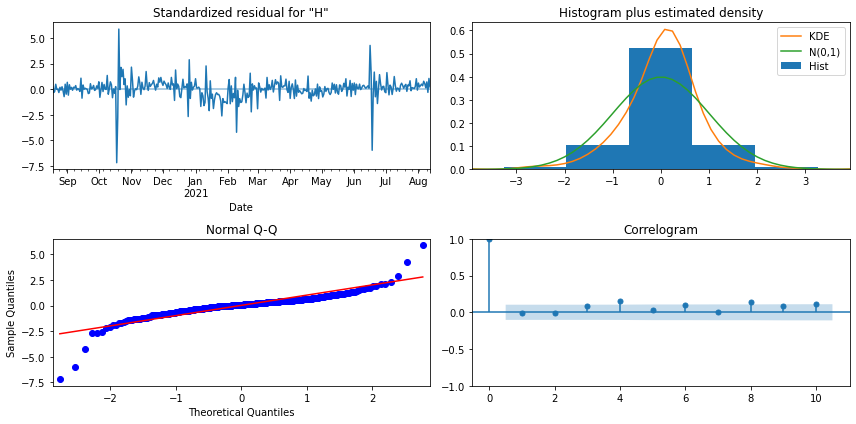

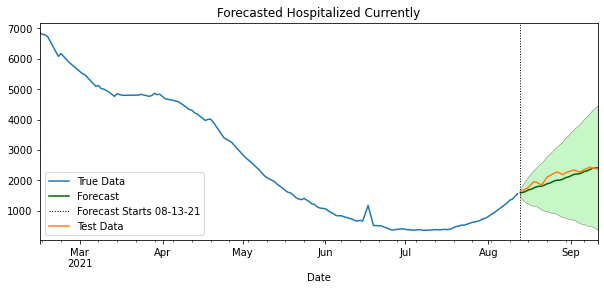

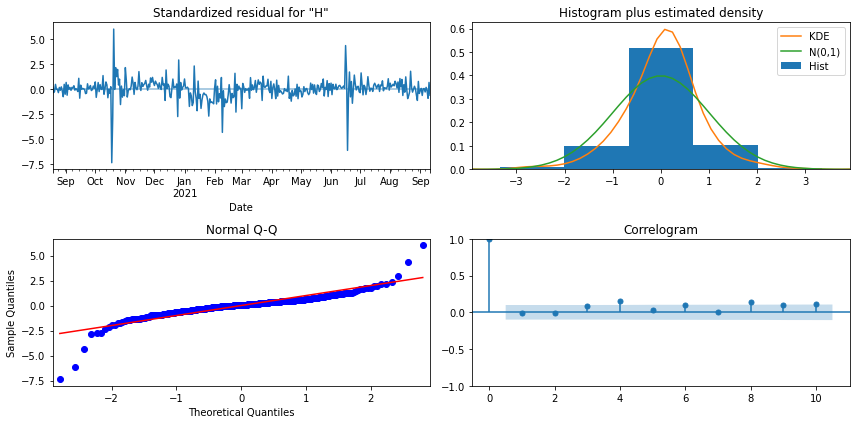

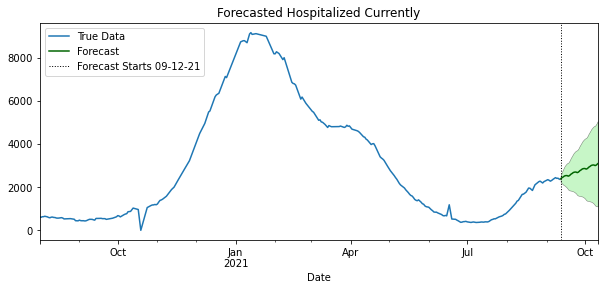

In [114]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model_flexible(DF,'NY','Hospitalized Currently')

# `@interact`

In [115]:
raise Exception("stop here to avoid interactive menu")

Exception: stop here to avoid interactive menu

In [ ]:
from ipywidgets import interact
import datetime as dt

@interact
def get_model(state=list(STATES.keys()),
             col=list(STATES['NY'].columns),model=False):
    if model:
        start = dt.datetime.now()
        ts,model = make_timeseries_model(STATES,state,col)
        end = dt.datetime.now()
        print(f'Modeling Process took {end-start} sec.')

# APPENDIX

In [ ]:
# !pip instal streamlit 
# !streamlist run app.py
!code app.py